This notebook allows to look at the data produced when models are trained with the main.py program.

It allows to monitor in real time the training of the models when we run main.py.

It is also useful because it allows to look at the training data of any trained models when the training is done.

In [29]:
import torch
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from copy import deepcopy
from pathlib import Path
import torch.nn.functional as F
import random

In [30]:
device =  "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [31]:
run = 1 # select here the run
H = 34 # select here the hidden layer size of the model you want to see 

In [32]:
K = 10 # Number of classes

class FCNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2, H)
        self.Matrix2 = nn.Linear(H, K)
        self.R = nn.ReLU()
    def forward(self,x):
        x = x.view(-1, 28**2)
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()

In [33]:
#loading training data
model = FCNeuralNetwork().to(device)
model.load_state_dict(torch.load(f'runs/run{1}/H{H}/model.pt'))
train_squared_loss_numpy=np.load(f'runs/run{1}/H{H}/train_squared_loss_numpy.npy')
val_squared_loss_numpy=np.load(f'runs/run{1}/H{H}/val_squared_loss_numpy.npy')
train_zero_one_loss_numpy=np.load(f'runs/run{1}/H{H}/train_zero_one_loss_numpy.npy')
val_zero_one_loss_numpy=np.load(f'runs/run{1}/H{H}/val_zero_one_loss_numpy.npy')

C:\Users\valentinvuillon\AppData\Local\Temp\ipykernel_101012\4182087347.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'runs/run{1}/H{

In [34]:
print(f"epoch number:{train_squared_loss_numpy.shape[0]}")  #here we look at how many epochs have been done

epoch number:25


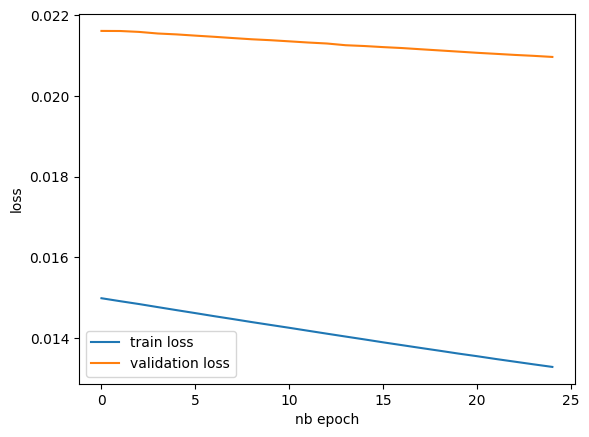

In [35]:
# here we plot the evolution of the train and val squared loss at each epoch.

plt.figure()
plt.plot(train_squared_loss_numpy, label='train loss')
plt.plot(val_squared_loss_numpy, label='validation loss')
plt.xlabel('nb epoch')
#plt.yscale("log")
plt.ylabel('loss')
plt.legend()

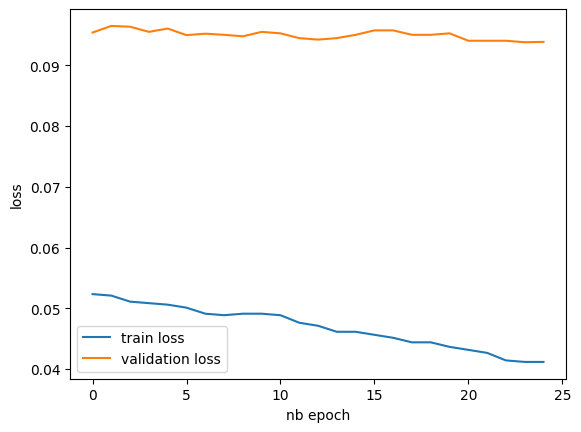

In [36]:
# here we plot the evolution of the train and val zero one loss at each epoch.

plt.figure()
plt.plot(train_zero_one_loss_numpy, label='train loss')
plt.plot(val_zero_one_loss_numpy, label='validation loss')
plt.xlabel('nb epoch')
#plt.yscale("log")
plt.ylabel('loss')
plt.legend()

In [37]:
print(train_zero_one_loss_numpy[-1]) #last train zero one loss

0.04117063492063492


In [38]:
print(val_zero_one_loss_numpy[-1]) #last test zero one loss

0.0938439005985856


In what follows we compute the train and test accuracy of the model obtained in the last epoch

In [39]:
class ImageDataset(Dataset):
    def __init__(self, x, y):
        self.x, self.y = x, y
        self.x = self.x / 255.  # We normalize the image amplitude between 0 and 1
        self.y = F.one_hot(self.y, num_classes=K).to(torch.float) # One hot encoding
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix): 
        return self.x[ix], self.y[ix]

In [40]:
x_train_subsampled=torch.load('dataset/x_train_subsampled.pt')
y_train_subsampled=torch.load('dataset/y_train_subsampled.pt')

x_test_subsampled=torch.load('dataset/x_test_subsampled.pt')
y_test_subsampled=torch.load('dataset/y_test_subsampled.pt')

train_dataset = ImageDataset(x_train_subsampled, y_train_subsampled)
test_dataset = ImageDataset(x_test_subsampled, y_test_subsampled)

C:\Users\valentinvuillon\AppData\Local\Temp\ipykernel_101012\3348697985.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_train_subsampled=torch.load('dataset/x_train_su

In [41]:
# accuracy on the train dataset of the last model
n=0
for i in range(len(train_dataset)):
    if (torch.argmax(model(train_dataset[i][0].to(device))).item() == y_train_subsampled[i]):
        n+=1

print(f'accuracy = {n/len(train_dataset)}')

accuracy = 0.9595


In [42]:
# accuracy on the test dataset of the last model
n=0
for i in range(len(test_dataset)):
    if (torch.argmax(model(test_dataset[i][0].to(device))).item() == y_test_subsampled[i]):
        n+=1

print(f'accuracy = {n/len(test_dataset)}')

accuracy = 0.9065
